In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore')

import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df_training= pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df_training.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
ids=df_test['Id']
df_training.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)
print("\nThe train data size is : {} ".format(df_training.shape)) 
print("The test data size is : {} ".format(df_test.shape))


The train data size is : (1460, 80) 
The test data size is : (1459, 79) 


In [5]:
cols=df_training.columns
types=dict(df_training.dtypes)
numeric_cols = [ c for c in cols if types[c] != 'object' ]
object_cols = [ c for c in cols if types[c] == 'object' ]

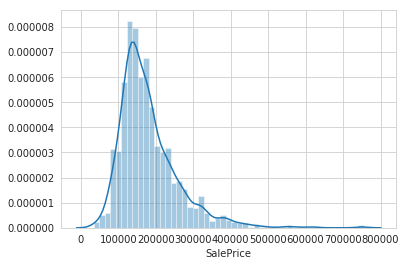

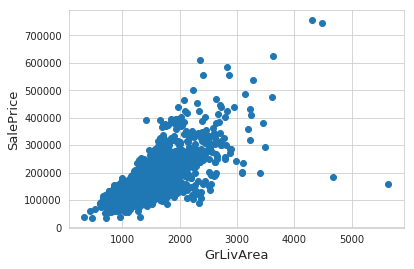

In [6]:
sns.distplot(df_training['SalePrice']);
fig, ax = plt.subplots()
ax.scatter(x = df_training['GrLivArea'], y = df_training['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

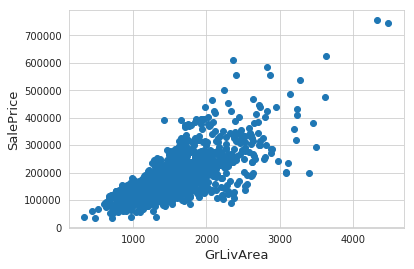

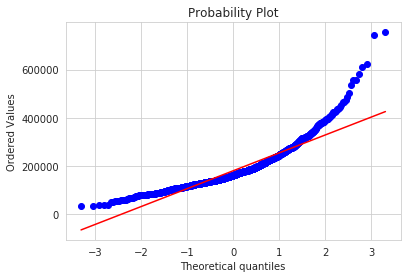

In [7]:
df_training.drop(df_training[(df_training['GrLivArea']>4000) & (df_training['SalePrice']<200000)].index,inplace=True)
fig, ax = plt.subplots()
ax.scatter(x = df_training['GrLivArea'], y = df_training['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_training['SalePrice'], plot=plt)
plt.show()

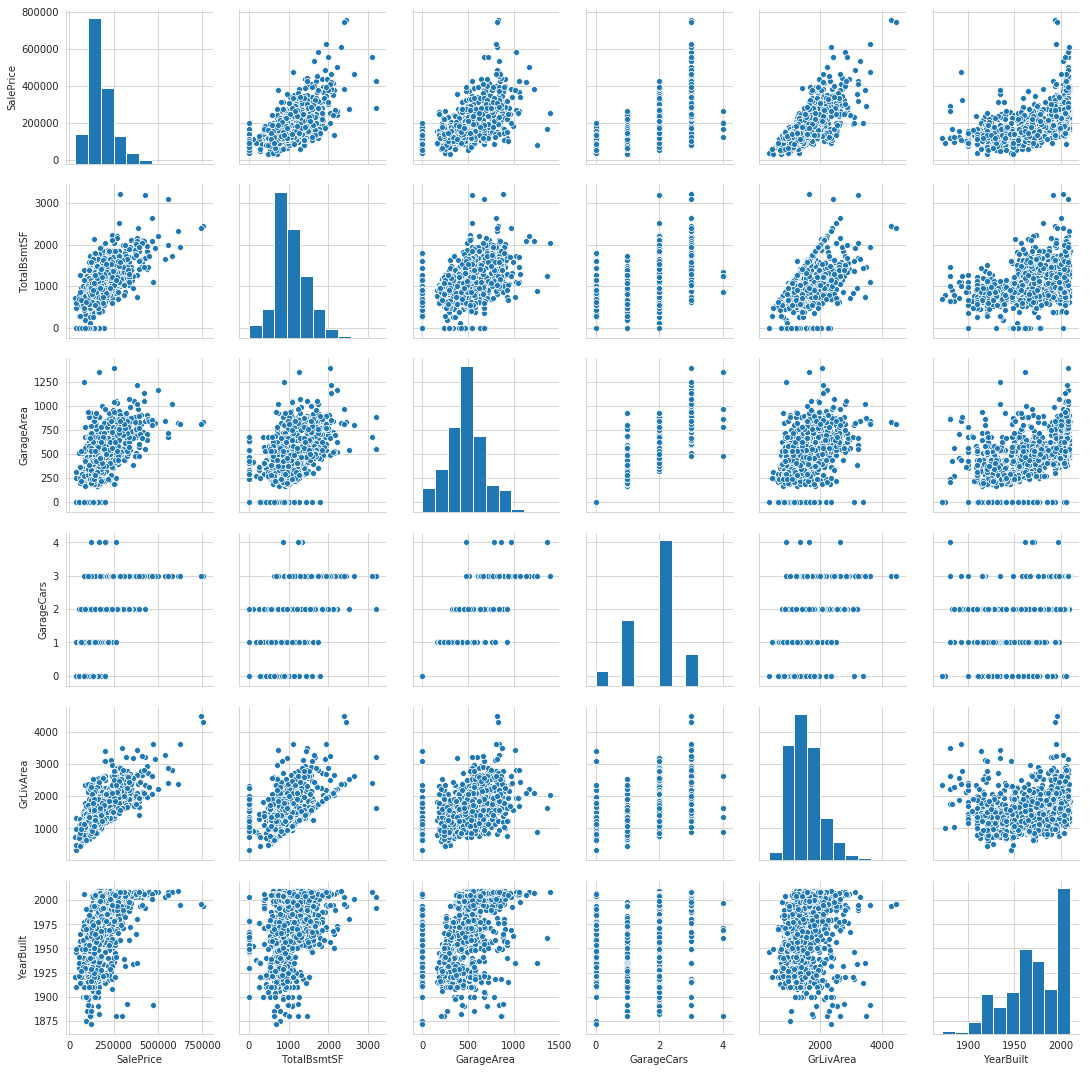

In [8]:
columns=['SalePrice','TotalBsmtSF','GarageArea','GarageCars','GrLivArea','YearBuilt']
sns.pairplot(df_training[columns])

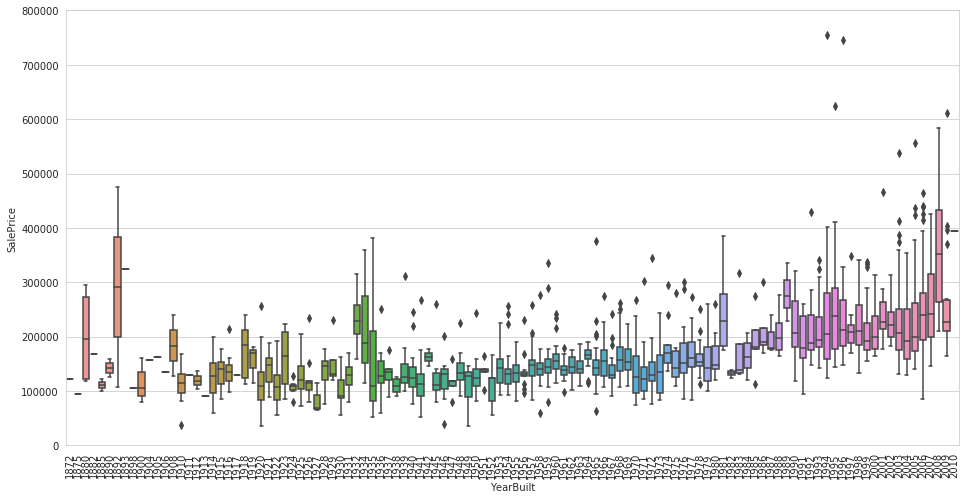

In [12]:
var = 'YearBuilt'
data = pd.concat([df_training['SalePrice'], df_training[var]], axis=1)
plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

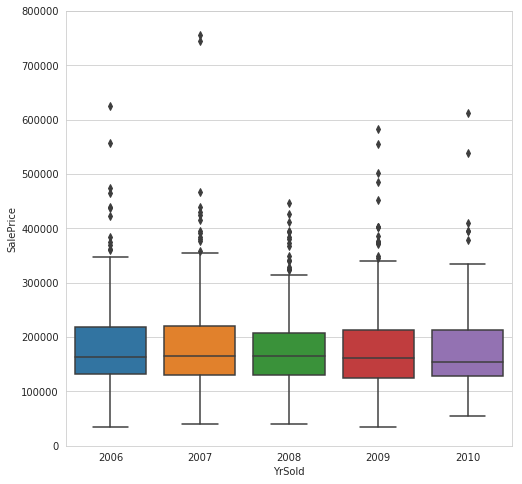

In [17]:
var = 'YrSold'
data = pd.concat([df_training['SalePrice'], df_training[var]], axis=1)
plt.subplots(figsize=(8, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [62]:
print("Mean: {}".format(df_training['SalePrice'].mean()))
print("Std: {}".format(df_training['SalePrice'].std()))
print("Skewness: {}".format(df_training['SalePrice'].skew()))
print("Kurtosis: {}".format(df_training['SalePrice'].kurt()))

Mean: 180932.91906721535
Std: 79495.05528474762
Skewness: 1.8812964895244009
Kurtosis: 6.523066888485879


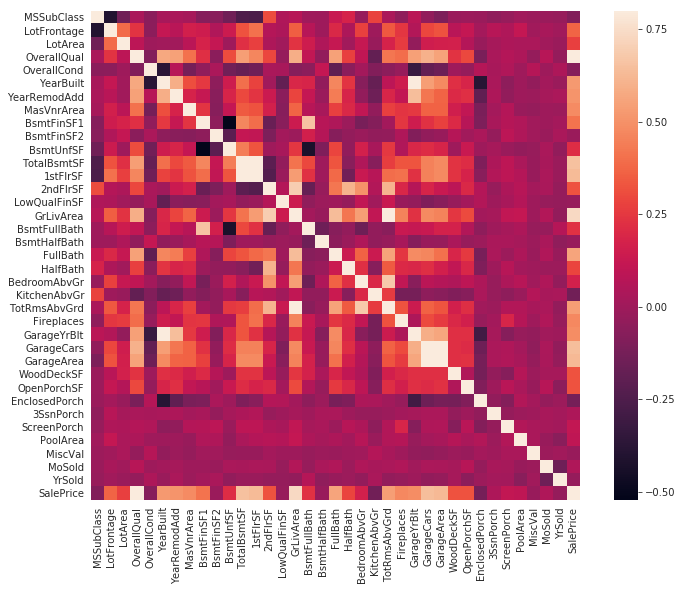

In [63]:
corr_matrix = df_training.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True);

In [64]:
#Missing data Training
missing_training=df_training.isnull().sum()
percentage_training=(missing_training/df_training.isnull().count()).sort_values(ascending=False)
df_missing_training=pd.concat([missing_training.sort_values(ascending=False),percentage_training],axis=1,keys=['Missing_Val','Percentage'])

In [65]:
df_missing_training.head(10)

,Missing_Val,Percentage
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageType,81,0.055556
GarageCond,81,0.055556
GarageFinish,81,0.055556
GarageQual,81,0.055556


In [66]:
#Missing data Test
missing_test=df_test.isnull().sum()
percentage_test=(missing_test/df_test.isnull().count()).sort_values(ascending=False)
df_missing_test=pd.concat([missing_test.sort_values(ascending=False),percentage_test],axis=1,keys=['Missing_Val','Percentage'])

In [67]:
df_missing_test.head(10)

,Missing_Val,Percentage
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageFinish,78,0.053461
GarageYrBlt,78,0.053461
GarageQual,78,0.053461


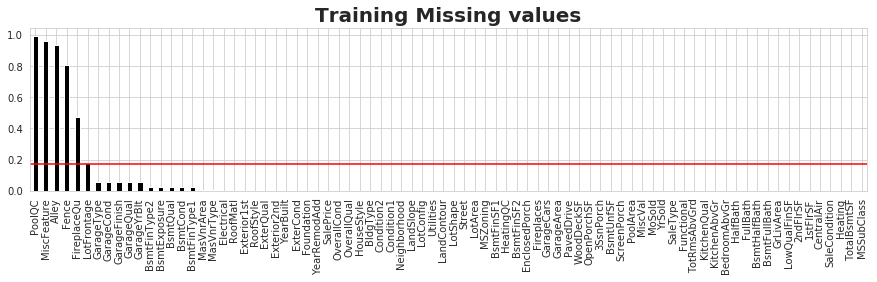

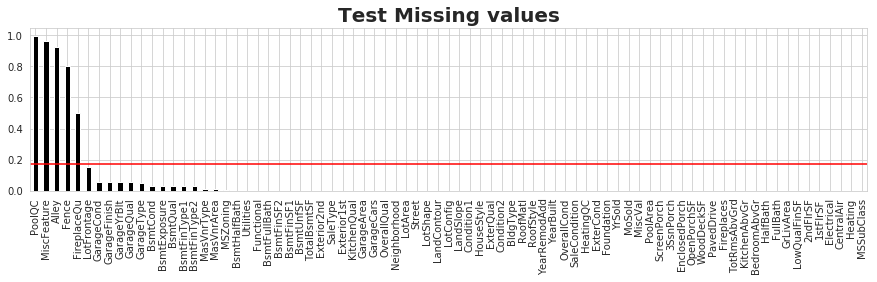

In [68]:
plt.subplots(0,0,figsize=(15,3))
percentage_training.plot.bar(color='black',figsize=(15,3))
plt.axhline(y=0.17, color='r', linestyle='-')
plt.title('Training Missing values', fontsize=20, weight='bold' )
plt.show()
plt.subplots(1,0,figsize=(15,3))
percentage_test.plot.bar(color='black',figsize=(15,3))
plt.axhline(y=0.17, color='r', linestyle='-')
plt.title('Test Missing values', fontsize=20, weight='bold' )
plt.show()

In [69]:
training_len = df_training.shape[0]
test_len = df_test.shape[0]
y = df_training['SalePrice'].values
all_data = pd.concat((df_training, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [70]:
#By reading the description file we see that it is wrong to drop all the NaN values as the fact that they do not have a value contain information
#the only column that can be dropped is MiscFeature
#df_training.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)
#df_test.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [71]:
all_data.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008
5,796,566,320,NaN,1,1Fam,TA,No,732.0,0.0,...,WD,0,Pave,5,796.0,AllPub,40,1993,1995,2009
6,1694,0,0,NaN,3,1Fam,TA,Av,1369.0,0.0,...,WD,0,Pave,7,1686.0,AllPub,255,2004,2005,2007
7,1107,983,0,NaN,3,1Fam,TA,Mn,859.0,32.0,...,WD,0,Pave,7,1107.0,AllPub,235,1973,1973,2009
8,1022,752,0,NaN,2,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,8,952.0,AllPub,90,1931,1950,2008
9,1077,0,0,NaN,2,2fmCon,TA,No,851.0,0.0,...,WD,0,Pave,5,991.0,AllPub,0,1939,1950,2008


In [72]:
all_data.drop(columns=['MSSubClass'],axis=1,inplace=True)

In [73]:
categorical = all_data.dtypes[df_training.dtypes == "object"].index
all_data[categorical].isnull().sum()

Alley            2719
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
BsmtQual           81
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2346
FireplaceQu      1420
Foundation          0
Functional          2
GarageCond        159
GarageFinish      159
GarageQual        159
GarageType        157
Heating             0
HeatingQC           0
HouseStyle          0
KitchenQual         1
LandContour         0
LandSlope           0
LotConfig           0
LotShape            0
MSZoning            4
MasVnrType         24
MiscFeature      2812
Neighborhood        0
PavedDrive          0
PoolQC           2908
RoofMatl            0
RoofStyle           0
SaleCondition       0
SaleType            1
Street              0
Utilities           2
dtype: int64

In [74]:
#all_data['Alley'].fillna('None',inplace=True)

In [75]:
mask=all_data['BsmtCond'].isnull()&(all_data['BsmtExposure'].notnull()|all_data['BsmtFinType1'].notnull()|all_data['BsmtFinType2'].notnull()|all_data['BsmtQual'].notnull())
all_data[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']][mask]

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual
2038,NaN,Mn,GLQ,Rec,Gd
2183,NaN,No,BLQ,Unf,TA
2522,NaN,Av,ALQ,Unf,TA


In [76]:
all_data.loc[mask,'BsmtCond']=all_data['BsmtCond'].mode()[0]

In [77]:
mask=all_data['BsmtExposure'].isnull()&(all_data['BsmtCond'].notnull()|all_data['BsmtFinType1'].notnull()|all_data['BsmtFinType2'].notnull()|all_data['BsmtQual'].notnull())
all_data[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']][mask]

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual
947,TA,NaN,Unf,Unf,Gd
1485,TA,NaN,Unf,Unf,Gd
2346,TA,NaN,Unf,Unf,Gd


In [78]:
all_data.loc[mask,'BsmtExposure']=all_data['BsmtExposure'].mode()[0]

In [79]:
mask=all_data['BsmtQual'].isnull()&(all_data['BsmtCond'].notnull()|all_data['BsmtFinType1'].notnull()|all_data['BsmtFinType2'].notnull()|all_data['BsmtExposure'].notnull())
all_data[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']][mask]

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual
2215,Fa,No,Unf,Unf,NaN
2216,TA,No,Unf,Unf,NaN


In [80]:
all_data.loc[mask,'BsmtQual']=all_data['BsmtQual'].mode()[0]

In [81]:
mask=all_data['BsmtFinType1'].isnull()&(all_data['BsmtCond'].notnull()|all_data['BsmtQual'].notnull()|all_data['BsmtFinType2'].notnull()|all_data['BsmtExposure'].notnull())
all_data[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual']][mask]

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual


In [82]:
all_data['Electrical'].fillna(df_training['Electrical'].mode()[0],inplace=True)
all_data['Exterior1st'].fillna(df_training['Exterior1st'].mode()[0],inplace=True)
all_data['Exterior2nd'].fillna(df_training['Exterior2nd'].mode()[0],inplace=True)
#all_data['Fence'].fillna('None',inplace=True)

In [83]:
mask=((all_data['FireplaceQu'].isnull())&(all_data['Fireplaces']!=0))|((all_data['FireplaceQu'].notnull())&(all_data['Fireplaces']==0))
all_data[mask]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold


In [85]:
mask=all_data['GarageCond'].isnull()&((all_data['GarageArea']!=0)|(all_data['GarageQual'].notnull())|(all_data['GarageFinish'].notnull())|(all_data['GarageType'].notnull())|(all_data['GarageYrBlt'].notnull()))
all_data[['GarageCond','GarageArea','GarageQual','GarageFinish','GarageType','GarageYrBlt']][mask]

,GarageCond,GarageArea,GarageQual,GarageFinish,GarageType,GarageYrBlt
2124,NaN,360.0,NaN,NaN,Detchd,NaN
2574,NaN,NaN,NaN,NaN,Detchd,NaN


In [86]:
all_data.loc[2124,'GarageCond']=all_data['GarageCond'].mode()[0]
all_data.loc[2124,'GarageQual']=all_data['GarageQual'].mode()[0]
all_data.loc[2124,'GarageFinish']=all_data['GarageFinish'].mode()[0]
all_data.loc[2124,'GarageYrBlt']=all_data['GarageYrBlt'].mode()[0]
all_data.loc[2574,'GarageType']=np.nan
all_data.loc[2574,'GarageArea']=0.

In [87]:
mask=all_data['GarageArea'].isnull()&((all_data['GarageCond'].notnull())|(all_data['GarageQual'].notnull())|(all_data['GarageFinish'].notnull())|(all_data['GarageType'].notnull())|(all_data['GarageYrBlt'].notnull()))
all_data[['GarageCond','GarageArea','GarageQual','GarageFinish','GarageType','GarageYrBlt']][mask]

,GarageCond,GarageArea,GarageQual,GarageFinish,GarageType,GarageYrBlt


In [88]:
mask=all_data['GarageQual'].isnull()&((all_data['GarageCond'].notnull())|(all_data['GarageArea']!=0)|(all_data['GarageFinish'].notnull())|(all_data['GarageType'].notnull())|(all_data['GarageYrBlt'].notnull()))
all_data[['GarageCond','GarageArea','GarageQual','GarageFinish','GarageType','GarageYrBlt']][mask]

,GarageCond,GarageArea,GarageQual,GarageFinish,GarageType,GarageYrBlt


In [89]:
mask=all_data['GarageType'].isnull()&((all_data['GarageCond'].notnull())|(all_data['GarageArea']!=0)|(all_data['GarageFinish'].notnull())|(all_data['GarageQual'].notnull())|(all_data['GarageYrBlt'].notnull()))
all_data[['GarageCond','GarageArea','GarageQual','GarageFinish','GarageType','GarageYrBlt']][mask]

,GarageCond,GarageArea,GarageQual,GarageFinish,GarageType,GarageYrBlt


In [90]:
mask=all_data['GarageYrBlt'].isnull()&((all_data['GarageCond'].notnull())|(all_data['GarageArea']!=0)|(all_data['GarageFinish'].notnull())|(all_data['GarageQual'].notnull())|(all_data['GarageQual'].notnull()))
all_data[['GarageCond','GarageArea','GarageQual','GarageFinish','GarageType','GarageYrBlt']][mask]

,GarageCond,GarageArea,GarageQual,GarageFinish,GarageType,GarageYrBlt


In [91]:
all_data['Functional'].fillna(all_data['Functional'].mode()[0],inplace=True)
all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0],inplace=True)
all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0],inplace=True)

In [92]:
mask=all_data['MasVnrType'].isnull()
all_data[mask][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
528,NaN,NaN
649,NaN,NaN
935,NaN,NaN
972,NaN,NaN
976,NaN,NaN
1242,NaN,NaN
1277,NaN,NaN
1689,NaN,NaN
1704,NaN,NaN


In [93]:
all_data.loc[2608,'MasVnrType']=all_data['MasVnrType'].mode()[0]

In [94]:
mask=(all_data['MasVnrArea']==0)&(all_data['MasVnrType']!='None')
all_data[mask][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
687,BrkFace,0.0
1240,Stone,0.0
2317,BrkFace,0.0


In [95]:
all_data.loc[mask,'MasVnrArea']=all_data['MasVnrArea'].mean()
all_data['MasVnrArea'].fillna(0,inplace=True)

In [96]:
all_data['SaleType'].fillna(all_data['SaleType'].mode()[0],inplace=True)
all_data['Utilities'].fillna(all_data['Utilities'].mode()[0],inplace=True)

In [97]:
all_data.update(all_data[categorical].fillna('None'))

In [98]:
all_data[categorical].isnull().sum()

Alley            0
BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
BsmtQual         0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
Fence            0
FireplaceQu      0
Foundation       0
Functional       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
Heating          0
HeatingQC        0
HouseStyle       0
KitchenQual      0
LandContour      0
LandSlope        0
LotConfig        0
LotShape         0
MSZoning         0
MasVnrType       0
MiscFeature      0
Neighborhood     0
PavedDrive       0
PoolQC           0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SaleType         0
Street           0
Utilities        0
dtype: int64

In [99]:
numerical = all_data.dtypes[all_data.dtypes != "object"].index
all_data[numerical].isnull().sum()

1stFlrSF           0
2ndFlrSF           0
3SsnPorch          0
BedroomAbvGr       0
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFullBath       2
BsmtHalfBath       2
BsmtUnfSF          1
EnclosedPorch      0
Fireplaces         0
FullBath           0
GarageArea         0
GarageCars         1
GarageYrBlt      158
GrLivArea          0
HalfBath           0
KitchenAbvGr       0
LotArea            0
LotFrontage      486
LowQualFinSF       0
MasVnrArea         0
MiscVal            0
MoSold             0
OpenPorchSF        0
OverallCond        0
OverallQual        0
PoolArea           0
ScreenPorch        0
TotRmsAbvGrd       0
TotalBsmtSF        1
WoodDeckSF         0
YearBuilt          0
YearRemodAdd       0
YrSold             0
dtype: int64

In [100]:
all_data['GarageCars'].fillna(all_data['GarageCars'].mode()[0],inplace=True)
all_data['GarageYrBlt'].fillna(all_data['GarageYrBlt'].mode()[0],inplace=True)

In [101]:
all_data.update(all_data[numerical].fillna(all_data[numerical].mean()))

In [102]:
all_data[numerical].isnull().sum()

1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
BedroomAbvGr     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFullBath     0
BsmtHalfBath     0
BsmtUnfSF        0
EnclosedPorch    0
Fireplaces       0
FullBath         0
GarageArea       0
GarageCars       0
GarageYrBlt      0
GrLivArea        0
HalfBath         0
KitchenAbvGr     0
LotArea          0
LotFrontage      0
LowQualFinSF     0
MasVnrArea       0
MiscVal          0
MoSold           0
OpenPorchSF      0
OverallCond      0
OverallQual      0
PoolArea         0
ScreenPorch      0
TotRmsAbvGrd     0
TotalBsmtSF      0
WoodDeckSF       0
YearBuilt        0
YearRemodAdd     0
YrSold           0
dtype: int64

In [103]:
all_data.drop(columns=['TotalBsmtSF'],axis=1,inplace=True)

In [110]:
all_data['OverallQual']=all_data['OverallQual'].astype(object)
all_data['OverallCond']=all_data['OverallCond'].astype(object)

In [104]:
all_data[['YearBuilt','YearRemodAdd','YrSold']]

,YearBuilt,YearRemodAdd,YrSold
0,2003,2003,2008
1,1976,1976,2007
2,2001,2002,2008
3,1915,1970,2006
4,2000,2000,2008
...,...,...,...
2912,1970,1970,2006
2913,1970,1970,2006
2914,1960,1996,2006
2915,1992,1992,2006


In [114]:
all_data=pd.get_dummies(all_data)

In [120]:
from sklearn.model_selection import train_test_split
X=np.array(all_data[:training_len])
Y=np.array(y)
test=np.array(all_data[training_len:])

In [121]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
forest=RandomForestRegressor(random_state=42)
forest.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [122]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [126]:
forest_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [127]:
forest_random.fit(X,Y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 20.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [128]:
forest_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [130]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3,4],
    'min_samples_split': [2,5,6],
    'n_estimators': [800,850,900,950]
}
# Create a based model
random_forest = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = random_forest, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)

In [132]:
grid_search.fit(X,Y)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-1)]: Done 576 out of 576 | elapsed: 45.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': ['auto'], 'min_samples_leaf': [1, 2, 3, 4], 'min_samples_split': [2, 5, 6], 'n_estimators': [800, 850, 900, 950]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [133]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 950}

In [135]:
#random_forest=RandomForestRegressor(bootstrap=True,max_depth=90,max_features='auto',min_samples_left=1,min_samples_split=2,n_estimators=950)
predictions=grid_search.predict(test)

In [141]:
predictions_df=pd.DataFrame({'Id':ids,'SalePrice':predictions})
predictions_df.to_csv('submission.csv', index=False)